<a href="https://colab.research.google.com/github/Aryamaan777/Dog-Breed-Classification/blob/master/DogBreeds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q kaggle
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6
!kaggle -v

In [0]:
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c dog-breed-identification

In [0]:
!mkdir train
!unzip dog-breed-identification.zip

In [0]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc3


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input,Dense,Conv2D,Dropout,Flatten,BatchNormalization,MaxPooling2D,GlobalMaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
train=pd.read_csv("/content/labels.csv")
train.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [0]:
train.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [0]:
ximg=[]

dogst=np.array(train["id"])
for dog in dogst:
  img=cv2.imread("/content/train/"+dog+".jpg")
  img=cv2.resize(img,(160,160)).flatten()
  img=np.array(img).reshape(160,160,3)
  ximg.append(img)

print(len(ximg))

10222


In [0]:
ximg=np.array(ximg)

In [0]:
print(min(y_val))

1


In [0]:
le=LabelEncoder()
train["breed"]=le.fit_transform(train["breed"])
trainclass=np.array(train["breed"])

In [0]:
x_train,x_val,y_train,y_val=train_test_split(ximg,trainclass,test_size=0.2)
y_train,y_val=y_train.flatten(),y_val.flatten()

In [0]:
"""i=Input(shape=x_train[0].shape)
x=Conv2D(16,(3,3),strides=2,activation="relu")(i)
#x=BatchNormalization()(x)
#x=MaxPooling2D(2,2)(x)
x=Conv2D(32,(3,3),strides=2,activation="relu")(x)
#x=BatchNormalization()(x)
#x=MaxPooling2D(2,2)(x)

x=Conv2D(32,(3,3),strides=2,activation="relu")(x)
#x=BatchNormalization()(x)
#x=MaxPooling2D(2,2)(x)
x=Conv2D(64,(3,3),strides=2,activation="relu")(x)
#x=BatchNormalization()(x)


#x=Conv2D(128,(3,3),strides=2,activation="relu")(x)
#x=BatchNormalization()(x)
#x=MaxPooling2D(2,2)(x)
#x=Conv2D(128,(3,3),strides=2,activation="relu")(x)
#x=BatchNormalization()(x)


x=GlobalMaxPooling2D()(x)
#x=Dropout(0.2)(x)
x=Dense(64,activation="relu")(x)
x=Dropout(0.2)(x)
#x=Dense(1024,activation="relu")(x)
x=Dense(120,activation="softmax")(x)

#32,32,64,64,128,128,(3,3) and both dropouts-74%

model=Model(i,x)"""

In [0]:
"""model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

r=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=20)

plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"],label="val_loss")
plt.legend()"""

In [0]:
pred=model.predict(x_val)
classes=np.argmax(pred,axis=1)
print(classes[7],y_val[7])

In [0]:
plt.plot(r.history["accuracy"],label="accuracy")
plt.plot(r.history["val_accuracy"],label="val_accuracy")
plt.legend()

In [0]:
datagen=ImageDataGenerator(rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.1)

datagen.fit(x_train)

In [0]:
"""model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) / 32, validation_data=(x_val,y_val),epochs=20)"""

In [0]:
"""plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"],label="val_loss")
plt.legend()"""

In [0]:
"""plt.plot(r.history["accuracy"],label="accuracy")
plt.plot(r.history["val_accuracy"],label="val_accuracy")
plt.legend()"""

In [0]:
i=Input(shape=x_train[0].shape)
x=tf.keras.applications.MobileNetV2(include_top=False)(i)
x.trainable=False
x=Conv2D(32,(3,3),strides=2,activation="relu")(x)
x=BatchNormalization()(x)

x=GlobalMaxPooling2D()(x)
x=Dense(1024,activation="relu")(x)
x=Dropout(0.2)(x)
x=Dense(512,activation="relu")(x)
x=Dropout(0.2)(x)
x=Dense(120,activation="softmax")(x)

model=Model(i,x)

Epoch 1/10
256/256 [==============================] - 24s 93ms/step - loss: 4.4990 - accuracy: 0.0591 - val_loss: 4.0080 - val_accuracy: 0.0963
Epoch 2/10
256/256 [==============================] - 23s 90ms/step - loss: 3.1655 - accuracy: 0.2362 - val_loss: 2.8407 - val_accuracy: 0.2709
Epoch 3/10
256/256 [==============================] - 23s 90ms/step - loss: 2.1485 - accuracy: 0.4153 - val_loss: 2.5436 - val_accuracy: 0.3218
Epoch 4/10
256/256 [==============================] - 23s 90ms/step - loss: 1.5090 - accuracy: 0.5637 - val_loss: 2.3630 - val_accuracy: 0.3707
Epoch 5/10
256/256 [==============================] - 23s 90ms/step - loss: 1.0742 - accuracy: 0.6804 - val_loss: 2.3023 - val_accuracy: 0.4054
Epoch 6/10
256/256 [==============================] - 23s 90ms/step - loss: 0.7681 - accuracy: 0.7730 - val_loss: 2.1908 - val_accuracy: 0.4264
Epoch 7/10
256/256 [==============================] - 23s 90ms/step - loss: 0.5520 - accuracy: 0.8345 - val_loss: 2.1788 - val_accuracy:

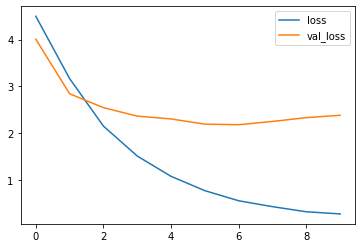

In [0]:
model.compile(optimizer=Adam(lr=0.0001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

r=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=10)

plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"],label="val_loss")
plt.legend()

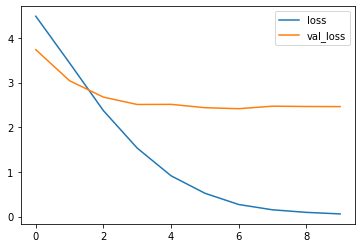

In [0]:
plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"],label="val_loss")
plt.legend()

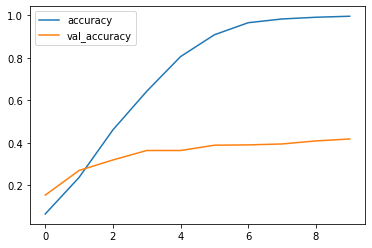

In [0]:
plt.plot(r.history["accuracy"],label="accuracy")
plt.plot(r.history["val_accuracy"],label="val_accuracy")
plt.legend()

In [0]:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) / 32, validation_data=(x_val,y_val),epochs=20)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
256/255 [==============================] - 49s 191ms/step - loss: 2.7281 - accuracy: 0.3534 - val_loss: 2.1097 - val_accuracy: 0.4753
Epoch 2/20
256/255 [==============================] - 49s 191ms/step - loss: 2.1273 - accuracy: 0.4359 - val_loss: 2.0694 - val_accuracy: 0.4650
Epoch 3/20
256/255 [==============================] - 49s 193ms/step - loss: 1.9228 - accuracy: 0.4805 - val_loss: 1.8173 - val_accuracy: 0.4929
Epoch 4/20
256/255 [==============================] - 50s 194ms/step - loss: 1.8300 - accuracy: 0.5030 - val_loss: 1.8171 - val_accuracy: 0.4944
Epoch 5/20
256/255 [==============================] - 49s 192ms/step - loss: 1.7011 - accuracy: 0.5223 - val_loss: 1.8817 - val_accuracy: 0.5002
Epoch 6/20
256/255 [==============================] - 49s 193ms/step - loss: 1.6101 - accuracy: 0.5484 - val_loss: 1.7983 - val_accuracy: 0.5169
Epoch 7/20
256/255 [==============================] - 